## 1. 데이터 전처리와 EDA(탐색적 데이터분석)
## 1) 데이터 전처리란? 
* 분석할 데이터 원본을 머신러닝 및 딥러닝을 할 수 있도록 준비하는 과정 
    * 데이터 타입 변환(문자/숫자) 
    * 결측값 처리 - 삭제 / 대치 
    * 이상값 탐지 - 표준편차 3% 이하 97% 이상 되는 값들, 4분위수 25% - (1.5 * IQR) 미만이거나 75% + (1.5 * IQR) 초과인 값 
    * 구간화 (나이) 
    * 정규화 / 표준화 
    * 카테고리 변수(범주형) 레이블 인코딩(더미변수화 , 원핫인코딩) 
    * 종속변수의 클래스 편향 수정(클래스 불균형 문제 해결) 
    * EDA를 통한 특성 생성 및 삭제

## 2) 데이터 전처리는 머신러닝을 통해 도출되는 모델의 성능에 직접적인 영향을 끼치는 중요요소. 

* Garbage in Garbage out 


In [810]:
import numpy as np 
import pandas as pd 
import matplotlib as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 


from sklearn.datasets import fetch_openml

# 보스턴 집값 데이터셋 불러오기
boston = fetch_openml(data_id=42165)


C:\Users\hi\anaconda3\envs\myvenv\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [811]:
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

In [812]:
bostonDF

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [813]:
df = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv",encoding="utf-8")

In [814]:
df["Age"].isna().sum()

177

## 데이터 전처리 없이 분석을 시도할 경우 생기는 일 

In [815]:
df2 = df.copy()

In [816]:
X2 = df2.drop("Survived",axis=1) # Survived라는 컬럼을 제거 독립변수를 만들기 위해 Target(종속변수) 삭제  X2에 저장 
y2 = df2["Survived"] # 종속변수만 따로 추출해서 y에 넣어놓기 

In [817]:
X2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [818]:
y2.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## 홀드아웃 (훈련데이터 / 테스트 데이터로 나눔) 8:2 

In [819]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size = 0.2, random_state=77)

In [820]:
X_train2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
32,33,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
525,526,3,"Farrell, Mr. James",male,40.5,0,0,367232,7.7500,NaN,Q
429,430,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S
270,271,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S
796,797,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S


In [821]:
#평가를 위한 라이브러리 

# from sklearn.metrics import accuracy_score 
# model2 = DecisionTreeClassifier(max_depth=3,random_state=7)
# model2.fit(X_train2,y_train2)
# pred2 = model2.predict(X_test2)
# print(accuracy_score(y_test2,pred2))

In [822]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [823]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [824]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2. 결측값 확인 및 처리 
* 결측값은 존재하지 않는 데이터를 의미 
* NA(Not Avaiable),NaN(Not a Number),Null,공백,-1
* 결측값은 삭제하는 것이 일반적
* 결측값을 무조건 삭제 하면 다른 데이터도 같이 삭제되기 때문에 데이터 손실이 커질 수 있음. 
* 결측값을 무조건 삭제하는 것이 아니라 보간해서 결측값을 메우는 작업을 해줌 

In [825]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [826]:
# 결측값 단순제거법 
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


## 1) 평균대치법 : 컬럼에 있는 데이터 값의 평균으로 결측값 대치 

In [827]:
# fillna(대치값)
df["Age"].fillna(round(df["Age"].mean(),2))

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    29.7
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [828]:
#fillna(대치값) 중앙값 

df["Age"].fillna(df["Age"].median()).tail()

886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, dtype: float64

In [829]:
# fillna(대치값) 최빈값
df["Age"].fillna(24.00).tail()

886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, dtype: float64

## (1) Scikit-learn의 SimpleImputer로 평균, 중앙 최빈값으로 대치 

In [830]:
from sklearn.impute import SimpleImputer

* mean 값으로 대치 

In [831]:
df["Age"].isna() == True

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [832]:
na_indices = df[df["Age"].isna()==True].index

In [833]:
imp_mean= SimpleImputer(missing_values=np.nan,strategy="mean")
df["Age"] = imp_mean.fit_transform(df["Age"].values.reshape(-1,1))[:,0]

In [834]:
df.loc[na_indices]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,29.699118,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.699118,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,29.699118,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,29.699118,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,29.699118,0,0,349217,7.8958,NaN,S


In [835]:
n = np.arange(24)

In [836]:
n.reshape(-4)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

* median으로 대치

In [837]:
imp_median= SimpleImputer(missing_values=np.nan,strategy="median")
imp_median.fit_transform(df["Age"].values.reshape(-1,1))[:,0]

array([22.        , 38.        , 26.        , 35.        , 35.        ,
       29.69911765, 54.        ,  2.        , 27.        , 14.        ,
        4.        , 58.        , 20.        , 39.        , 14.        ,
       55.        ,  2.        , 29.69911765, 31.        , 29.69911765,
       35.        , 34.        , 15.        , 28.        ,  8.        ,
       38.        , 29.69911765, 19.        , 29.69911765, 29.69911765,
       40.        , 29.69911765, 29.69911765, 66.        , 28.        ,
       42.        , 29.69911765, 21.        , 18.        , 14.        ,
       40.        , 27.        , 29.69911765,  3.        , 19.        ,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 18.        ,
        7.        , 21.        , 49.        , 29.        , 65.        ,
       29.69911765, 21.        , 28.5       ,  5.        , 11.        ,
       22.        , 38.        , 45.        ,  4.        , 29.69911765,
       29.69911765, 29.        , 19.        , 17.        , 26.  

## 최빈값으로 대치 

In [838]:
imp_most_frequent= SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imp_most_frequent.fit_transform(df["Age"].values.reshape(-1,1))[:,0]

array([22.        , 38.        , 26.        , 35.        , 35.        ,
       29.69911765, 54.        ,  2.        , 27.        , 14.        ,
        4.        , 58.        , 20.        , 39.        , 14.        ,
       55.        ,  2.        , 29.69911765, 31.        , 29.69911765,
       35.        , 34.        , 15.        , 28.        ,  8.        ,
       38.        , 29.69911765, 19.        , 29.69911765, 29.69911765,
       40.        , 29.69911765, 29.69911765, 66.        , 28.        ,
       42.        , 29.69911765, 21.        , 18.        , 14.        ,
       40.        , 27.        , 29.69911765,  3.        , 19.        ,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 18.        ,
        7.        , 21.        , 49.        , 29.        , 65.        ,
       29.69911765, 21.        , 28.5       ,  5.        , 11.        ,
       22.        , 38.        , 45.        ,  4.        , 29.69911765,
       29.69911765, 29.        , 19.        , 17.        , 26.  

# 2) K-최근접이웃을 이용한 결측값 대치

In [839]:
from sklearn.impute import KNNImputer

In [840]:
KNN_imputer = KNNImputer()
df["Age"]= KNN_imputer.fit_transform(df["Age"].values.reshape(-1,1))[:,0]

In [841]:
df.iloc[na_indices]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,29.699118,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.699118,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,29.699118,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,29.699118,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,29.699118,0,0,349217,7.8958,NaN,S


In [842]:
df[["Cabin"]]

,Cabin
0,NaN
1,C85
2,NaN
3,C123
4,NaN
...,...
886,NaN
887,B42
888,NaN
889,C148


## 컬럼 내 결측값이 전체 데이터의 50%가 넘으면 열 자체를 삭제 해야한다.

In [843]:
df["Cabin"].isna().sum()

687

In [844]:
687/891*100

77.10437710437711

# 컬럼 삭제하기 
```python
df.drop("#삭제할컬럼명",axis=1) #컬럼 삭제하기
df.drop(index) #인덱스 삭제하기
```

* inplace=True를 사용하면 재할당 없이 바로 반영되어 삭제된다.

In [845]:
df.drop("Cabin",axis=1,inplace=True)

In [846]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [847]:
df[df["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [848]:
df["Embarked"] = df["Embarked"].fillna("S")

## 이상값 탐지

<Axes: >

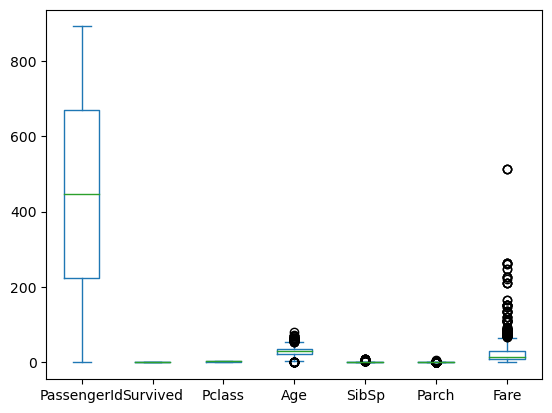

In [849]:
df.plot(kind='box')

<Axes: >

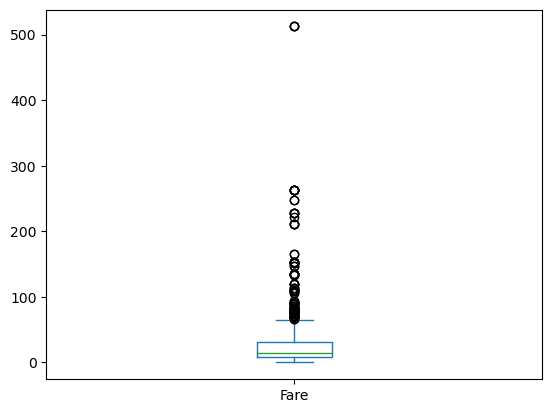

In [850]:
df["Fare"].plot(kind="box")

In [851]:
# 아웃라이어를 계산하는 함수
def outlier(x):
    x = x.describe()
    out_max = x.loc["75%"] + (1.5*(x.loc["75%"]-x.loc["25%"]))
    out_min = x.loc["25%"] - (1.5*(x.loc["75%"]-x.loc["25%"]))
    ol_result = pd.DataFrame([out_max,out_min],columns=out_max.index,index=["상한값","하한값"])
    result = pd.concat([x,ol_result])
    return result
    

In [852]:
outlier(df)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
상한값,1336.000000,2.500000,4.500000,54.500000,2.500000,0.000000,65.634400
하한값,-444.000000,-1.500000,0.500000,2.500000,-1.500000,0.000000,-26.724000


In [853]:
x = df.describe()

In [854]:
out_min = x.loc["25%"] - ((x.loc["75%"]-x.loc["25%"])*1.5)

out_max = x.loc["75%"]+((x.loc["75%"]-x.loc["25%"])*1.5)

In [855]:
ol_result = pd.DataFrame([out_max,out_min],columns=out_max.index,index=['상한값','하한값'])
ol_result

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
상한값,1336.0,2.5,4.5,54.5,2.5,0.0,65.6344
하한값,-444.0,-1.5,0.5,2.5,-1.5,0.0,-26.7240


In [856]:
result = pd.concat([x,ol_result])
result

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
상한값,1336.000000,2.500000,4.500000,54.500000,2.500000,0.000000,65.634400
하한값,-444.000000,-1.500000,0.500000,2.500000,-1.500000,0.000000,-26.724000


In [857]:
df[df["Fare"]>65.634400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,C
...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.5500,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,29.699118,1,0,17453,89.1042,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,1,1,36928,164.8667,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,S


* 확인결과 
* Fare 컬럼에 이상값이 있다 
* 4분위수로 계산해서 상한 최대값 이상인 컬럼만 필터링


* 필터링 결과 Fare가 이상값을 갖는 데이터는 SibSp,Parch 컬럼에 1이상의 데이터가 있음
* SibSp : 형제 , 자매, 수, Parch : 부모,자식 
* 형제 자매나 부모 자식이 있는 경우 표를 한 사람이 다른 가족 구성원의 것 까지 같이 구매 했을 가능성이 있음
* SibSp,Parch를 family 컬럼으로 합치고 Fare를 그 수로 나누면 정상적인 fare가격 산출 가능 

### Sibsp,Parch를 family 컬럼으로 합치기 (파생변수 만들기) 

In [858]:
df["Family"] = df["SibSp"] + df["Parch"] + 1

In [859]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1


## Fare를 Family 수로 나누어 표 1개의 가격 산출해 adj_fare컬럼으로 생성

In [860]:
df["adj_fare"] = df["Fare"] / df["Family"]

In [861]:
outlier(df)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family,adj_fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602,19.916375
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,1.613459,35.841257
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000,7.250000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,8.300000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000,23.666667
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000,512.329200
상한값,1336.000000,2.500000,4.500000,54.500000,2.500000,0.000000,65.634400,3.500000,48.291667
하한값,-444.000000,-1.500000,0.500000,2.500000,-1.500000,0.000000,-26.724000,-0.500000,-17.375000


In [862]:
df[df["adj_fare"]== 512.329200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,adj_fare
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,1,512.3292
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,1,512.3292


In [863]:
891 - df["Ticket"].nunique()

210

In [864]:
512.3292 / 2


256.1646

* 가장 비싼 1등실 가격은 256.1646

## Feature Engineering , Feature Selection 
* 변수선택 
* 파생변수 생성 

In [865]:
df[(df["Pclass"]==1)]["adj_fare"].mean()
df[(df["Pclass"]==1)]["adj_fare"].median()

33.760400000000004

* Fare는 불확실성이 커서 사용 불가
* Ticket,adj_fare 사용 불가

# 분석 목적 : 고객 정보를 통해 생존 여부 판별 
* target변수(종속변수) : Survived
* 분석에 사용할 변수 선택 

In [866]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Family', 'adj_fare'],
      dtype='object')

In [867]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Embarked', 'Family']]
df

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,male,22.000000,S,2
1,1,1,female,38.000000,C,2
2,1,3,female,26.000000,S,1
3,1,1,female,35.000000,S,2
4,0,3,male,35.000000,S,1
...,...,...,...,...,...,...
886,0,2,male,27.000000,S,1
887,1,1,female,19.000000,S,1
888,0,3,female,29.699118,S,4
889,1,1,male,26.000000,C,1


## groupby를 통해서 독립변수와 종속변수의 관계를 파악

<Axes: xlabel='Pclass,Survived'>

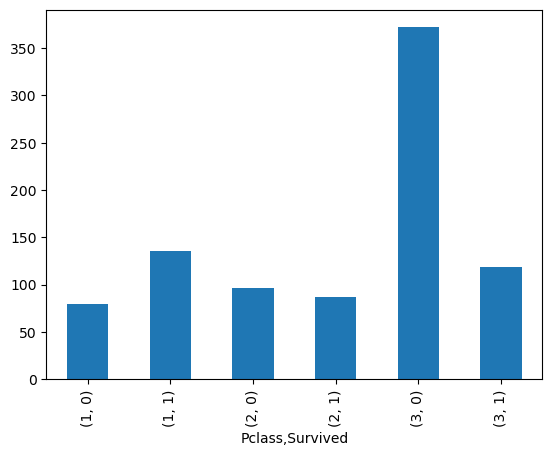

In [868]:
df.groupby(['Pclass'])['Survived'].value_counts(sort=False).plot(kind="bar")

# Pclass별 생존율 구하기 

In [869]:
df.groupby(['Pclass'])['Survived'].value_counts(sort=False)

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [870]:
# Pclass가 1일 때 생존율

In [871]:
round(136/(80 + 136) * 100,2)

62.96

In [872]:
# Pclass 2일 떄 생존율 

In [873]:
round(87/(97+87) * 100,2)

47.28

In [874]:
# Pclass가 3일 때 생존율 

In [875]:
round(119 / (372+119) * 100,2)

24.24

# 결론 
* Pclass가 높으면 ( 1등급 ) 생존율이 높다는 추측을 할 수 있음

<Axes: xlabel='Sex,Survived'>

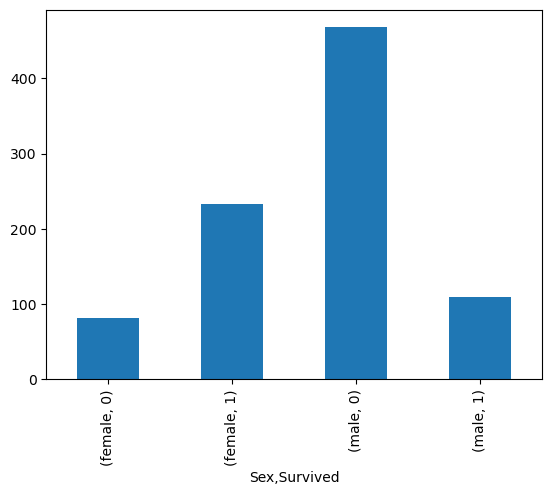

In [876]:
df.groupby("Sex")["Survived"].value_counts(sort=False).plot(kind="bar")

In [877]:
df.groupby("Sex")["Survived"].value_counts(sort=False)

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: count, dtype: int64

In [878]:
round(233/(81+233) * 100 ,1)

74.2

In [879]:
round(109/(468+109) * 100 ,2)

18.89

## 결론 
* 여성인 경우 남성보다 생존율이 높다

In [880]:
df["Age"].nunique()

89

In [881]:
df["Age"].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

## 나이를 구간화 하고 생존율과의 관계 알아보기

In [882]:
# 0살부터 9살까지 10살부터 19살, 20살 29살 30살 39살 .... 나이 구간화 

In [883]:
def age_dist(i):
        if 0 < i < 10:
            return 'under10s'
        elif 10 <= i < 20:
            return '10s'
        elif 20<= i < 30:
            return '20s'
        elif 30 <= i < 40:
            return '30s'
        elif 40<= i < 50 :
            return '40s'
        elif 50 <= i < 60:
            return '50s'
        elif 60<= i < 70:
            return '60s'
        elif 70<= i <80:
            return '70s'
        elif 80<= i < 90:
            return '80s'
        

In [884]:
df

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,male,22.000000,S,2
1,1,1,female,38.000000,C,2
2,1,3,female,26.000000,S,1
3,1,1,female,35.000000,S,2
4,0,3,male,35.000000,S,1
...,...,...,...,...,...,...
886,0,2,male,27.000000,S,1
887,1,1,female,19.000000,S,1
888,0,3,female,29.699118,S,4
889,1,1,male,26.000000,C,1


In [885]:
# df.loc[:,"Age"] = df["Age"].apply(age_dist)

<Axes: xlabel='Age,Survived'>

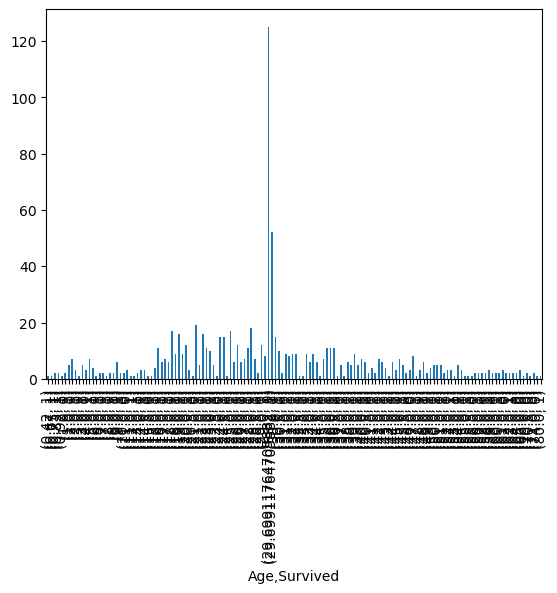

In [886]:
df.groupby("Age")["Survived"].value_counts(sort=False).plot(kind="bar")

In [887]:
df.groupby("Age")["Survived"].value_counts(sort=False)

Age    Survived
0.42   1           1
0.67   1           1
0.75   1           2
0.83   1           2
0.92   1           1
                  ..
70.00  0           2
70.50  0           1
71.00  0           2
74.00  0           1
80.00  1           1
Name: count, Length: 144, dtype: int64

In [888]:
round(41/(61+41)*100,2)

40.2

In [889]:
round(129/(268+129)*100,2)

32.49

In [890]:
round(73/(94+73)*100,2)

43.71

## cut 함수를 이용해 나이의 구간 나누기

In [891]:
bins = [0,10,20,30,40,50,60,70,81]
df.loc[:,"Age"] = pd.cut(df["Age"],bins,right=False)

In [892]:
a = df.groupby("Age")["Survived"].value_counts(sort=False)

In [893]:

dead = 0
surv = 0
surv_ratio_result = {}
for i,j in zip(a.index,a):
    if i[1] == 0 :
        dead = j
    elif i[1] == 1:
        surv = j 
        surv_ratio = round(surv/(dead+surv)*100,2)
        print(f'{i[0]}의 생존율: {surv_ratio}')
        surv_ratio_result[i[0]] = surv_ratio

[0, 10)의 생존율: 61.29
[10, 20)의 생존율: 40.2
[20, 30)의 생존율: 32.49
[30, 40)의 생존율: 43.71
[40, 50)의 생존율: 38.2
[50, 60)의 생존율: 41.67
[60, 70)의 생존율: 31.58
[70, 81)의 생존율: 14.29


In [894]:
df

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,male,"[20, 30)",S,2
1,1,1,female,"[30, 40)",C,2
2,1,3,female,"[20, 30)",S,1
3,1,1,female,"[30, 40)",S,2
4,0,3,male,"[30, 40)",S,1
...,...,...,...,...,...,...
886,0,2,male,"[20, 30)",S,1
887,1,1,female,"[10, 20)",S,1
888,0,3,female,"[20, 30)",S,4
889,1,1,male,"[20, 30)",C,1


In [895]:
surv_ratio

14.29

In [896]:
def surv(age,ratio):
    return ratio[age]

In [897]:
df.loc[:,'Survival Rate'] = df['Age'].apply(lambda x: surv_ratio_result.get(x))

C:\Users\hi\AppData\Local\Temp\ipykernel_9384\3256282876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Survival Rate'] = df['Age'].apply(lambda x: surv_ratio_result.get(x))


In [898]:
df

,Survived,Pclass,Sex,Age,Embarked,Family,Survival Rate
0,0,3,male,"[20, 30)",S,2,32.49
1,1,1,female,"[30, 40)",C,2,43.71
2,1,3,female,"[20, 30)",S,1,32.49
3,1,1,female,"[30, 40)",S,2,43.71
4,0,3,male,"[30, 40)",S,1,43.71
...,...,...,...,...,...,...,...
886,0,2,male,"[20, 30)",S,1,32.49
887,1,1,female,"[10, 20)",S,1,40.20
888,0,3,female,"[20, 30)",S,4,32.49
889,1,1,male,"[20, 30)",C,1,32.49


In [899]:
def dist_round(x):
    x = x.groupby("Age")["Survived"].value_counts()
    for i,j in zip(x.index,x):
        if i[1] == 0 :
        dead = j
    elif i[1] == 1:
        surv = j 
        surv_ratio = round(surv/(dead+surv)*100,2)
        print(f'{i[0]}의 생존율: {surv_ratio}')
            
        

IndentationError: expected an indented block (2397200520.py, line 5)

In [ ]:
df.groupby(["Pclass","Sex"])["Survived"].value_counts().plot(kind="bar")

In [ ]:
df.groupby(["Pclass","Sex"])["Survived"].value_counts()

## Embarked에 따른 생존율

In [ ]:
embarked = df.groupby('Embarked')['Survived'].value_counts(sort=False)

In [ ]:
df.groupby('Embarked')['Survived'].value_counts(sort=False).plot(kind="bar")

In [ ]:
for i,j in zip(embarked.index,embarked):

In [ ]:
embark_dead = 0 
embark_surv = 0

embark_surv_dict= {}
for i,j in zip(embarked.index,embarked):
    if i[1] == 0:
        embark_dead = j 
    elif i[1]== 1 :
        embark_surv = j
        embark_surv_result =round(embark_surv / (embark_dead + embark_surv)* 100,2)
        embark_surv_dict[i[0]] = embark_surv_result
        
        

In [ ]:
embark_surv_dict

## 파생변수 더미변수 만들기 
* df1 -  pclass를 현재 그대로 유지 나머지를 더미변수화 
* df2 - pclass를 서열변수로 처리해 1 → 3 , 3→ 1로 변경 
* df3 - pclass를 더미변수화

In [ ]:
df

In [ ]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

In [ ]:
df1 =pd.get_dummies(df1,columns=['Sex','Age','Embarked'],drop_first=True)

In [ ]:
df1

In [ ]:
# Pclass의 1이 서열이 가장 높으므로 1에 높은 숫자 부여 1 -> 3 , 3->1 

df2["Pclass"] = df2["Pclass"].replace({1:3,3:1})

In [ ]:
df2.head()

In [ ]:
df2 = pd.get_dummies(df2,columns=["Sex","Age","Embarked"],drop_first=True)

In [ ]:
df3 = pd.get_dummies(df3,columns=["Pclass","Sex","Age","Embarked"],drop_first=True)

In [ ]:
df1["Survival Rate"] = df1["Survival Rate"].astype(int)

In [ ]:
df1.info()

In [ ]:
df2["Survival Rate"] = df2["Survival Rate"].astype(int)

In [ ]:
df3["Survival Rate"] = df3["Survival Rate"].astype(int)

In [ ]:
df3.info()

## 데이터를 훈련 데이터/테스트 데이터로 나누기
* 홀드아웃 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X1 = df1.drop("Survived",axis=1)
X2 = df2.drop("Survived",axis=1)
X3 = df3.drop("Survived",axis=1)

y1 = df1["Survived"]
y2 = df2["Survived"]
y3 = df3["Survived"]

In [ ]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,random_state=10)
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2,random_state=10)
X3_train,X3_test,y3_train,y3_test = train_test_split(X3,y3,test_size=0.2,random_state=10)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model1 = DecisionTreeClassifier(max_depth=5,random_state=10)
model1.fit(X1_train,y1_train)

In [ ]:
pred1 = model1.predict(X1_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
print(accuracy_score(y1_test,pred1))
print(confusion_matrix(y1_test,pred1))
print(classification_report(y1_test,pred1))

## df2에 대한 분석 
* pclass를 서열변수화 처리한 것을 확인 

In [ ]:
model2 = DecisionTreeClassifier(max_depth=5,random_state=10)
model2.fit(X2_train,y2_train)
pred2 = model2.predict(X2_test)

print(accuracy_score(y2_test,pred2))
print(confusion_matrix(y2_test,pred2))
print(classification_report(y2_test,pred2))

## df3에 대한 분석 
* Pclass도 더미변수화 

In [ ]:
model3 = DecisionTreeClassifier(max_depth=5,random_state=10)
model3.fit(X3_train,y3_train)
pred3 = model3.predict(X3_test)

print(accuracy_score(y3_test,pred3))
print(confusion_matrix(y3_test,pred3))
print(classification_report(y3_test,pred3))

In [ ]:
df

In [921]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv",encoding="utf-8")

In [901]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.columns

In [922]:
data = data[[ 'Survived', 'Pclass', 'Sex', 'Embarked']]

In [923]:
data = pd.get_dummies(data,columns=['Sex', 'Embarked'],drop_first=True)

In [924]:
X = data.drop('Survived',axis=1)

In [ ]:
data

In [940]:
y = data["Survived"]

In [941]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [942]:
model = DecisionTreeClassifier(max_depth=5,random_state=10)
model.fit(X_train,y_train)
pred = model.predict(X_test)

print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8268156424581006
[[111   6]
 [ 25  37]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       117
           1       0.86      0.60      0.70        62

    accuracy                           0.83       179
   macro avg       0.84      0.77      0.79       179
weighted avg       0.83      0.83      0.82       179



In [928]:
from sklearn.ensemble import RandomForestClassifier

In [929]:
rfc = RandomForestClassifier(max_depth = 10, n_estimators =100,random_state=10)

In [943]:
y_test

590    0
131    0
628    0
195    1
230    1
      ..
456    0
191    0
603    0
94     0
766    0
Name: Survived, Length: 179, dtype: int64

In [944]:
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
print(accuracy_score(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

0.8268156424581006
[[111   6]
 [ 25  37]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       117
           1       0.86      0.60      0.70        62

    accuracy                           0.83       179
   macro avg       0.84      0.77      0.79       179
weighted avg       0.83      0.83      0.82       179



## 하이퍼 파라미터 튜닝 
* Decision Tree에 max_depth값 변경 하면서 결과 확인 

In [948]:
model3 = DecisionTreeClassifier(max_depth=6,random_state=10,criterion="entropy")
model3.fit(X3_train,y3_train)
pred3 = model3.predict(X3_test)
print(accuracy_score(y3_test,pred3))
print(confusion_matrix(y3_test,pred3))
print(classification_report(y3_test,pred3))

0.8603351955307262
[[110   7]
 [ 18  44]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       117
           1       0.86      0.71      0.78        62

    accuracy                           0.86       179
   macro avg       0.86      0.82      0.84       179
weighted avg       0.86      0.86      0.86       179

